# import cv2

In [1]:
import cv2
import numpy as np

ix, iy, k = 200,200,1
def onMouse(event, x, y, flag, param):
    global ix,iy,k
    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y 
        k = -1

cv2.namedWindow("window")
cv2.setMouseCallback("window", onMouse)

cap = cv2.VideoCapture('video.mp4')


old_pts = np.array([[271,233]], dtype="float32").reshape(-1,1,2)

old_pts1 = np.array([[261,233]], dtype="float32").reshape(-1,1,2)
mask = np.zeros_like((960, 540))

frm = np.zeros_like((960, 540))
i=0
while i<388:
    if(i==0):
        _, frm = cap.read()
        frm = cv2.resize(frm, (960, 540))    
        old_gray = cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)
        cv2.imwrite('test.jpg', old_gray)
        old_pts = np.array([[271,233]], dtype="float32").reshape(-1,1,2)
        old_pts1= np.array([[250,240]], dtype="float32").reshape(-1,1,2)
        i=i+1
        mask = np.zeros_like(frm)
        continue
    i=i+1
    
    _, frame2 = cap.read()
    
    frame2 = cv2.resize(frame2, (960, 540))    
    new_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    new_gray = cv2.resize(new_gray, (960, 540))   
    
    
    new_pts,status,err = cv2.calcOpticalFlowPyrLK(old_gray, 
                         new_gray, 
                         old_pts, 
                         None, maxLevel=1,
                         criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                         15, 0.08))

    cv2.circle(mask, (new_pts.ravel()[0] ,new_pts.ravel()[1]), 1, (0,255,0), 1)

    
    new_pts1,status,err = cv2.calcOpticalFlowPyrLK(old_gray, 
                         new_gray, 
                         old_pts1, 
                         None, maxLevel=1,
                         criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                         15, 0.08))

    cv2.circle(mask, (new_pts1.ravel()[0] ,new_pts1.ravel()[1]), 1, (0,255,10), 1)
    
    combined = cv2.addWeighted(frame2, 0.7, mask, 0.3, 0.1)

    cv2.imshow("new win", mask)
    cv2.imshow("wind", combined)

    old_gray = new_gray.copy()
    old_pts = new_pts.copy()
    old_pts1 = new_pts1.copy()

    if cv2.waitKey(1) == 27 or i==386:
        cap.release()
        cv2.destroyAllWindows()
        break


In [2]:
import cv2

def showImg(x, path = None, image=None):
    ix, iy = 0,0
    def onMouse1(event, x, y, flag, param):
        global ix,iy,k
        if event == cv2.EVENT_LBUTTONDOWN:
            ix,iy = x,y 
            print(x, y)


    cv2.namedWindow("actual")
    cv2.setMouseCallback("actual", onMouse1)

    if(x==1):
        image = cv2.imread(path)
        cv2.imshow('actual', image)
    elif(x==2):
        #image = cv2.imread('test.jpg')
        cv2.imshow('actual', image)
    else:
        image = cv2.imread('test.jpg')
        cv2.imshow('actual', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
showImg(2, None, image1)

In [ ]:
image1[423, 611]

In [12]:
import numpy as np
import cv2

cap = cv2.VideoCapture('video.mp4')

print(type(cap))

# while(cap.isOpened()):
#     ret, image = cap.read()    
#     loadedImage = cv2.imdecode(image, cv2.IMREAD_COLOR)
#     cv2.imshow('frame',loadedImage)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

cap.release()
cv2.destroyAllWindows()

<class 'cv2.VideoCapture'>


In [ ]:
print("x")

#start

In [ ]:
def selectNode():
    
    ix, iy, k = 0, 0, 1
    def onMouse(event, x, y, flag, param):
        global ix,iy,k
        if event == cv2.EVENT_LBUTTONDOWN:
            ix,iy = x,y 
            k = -1
        
    cv2.namedWindow("Labels")
    cv2.setMouseCallback("Labels", onMouse)
    
    image = cv2.imread('test_color.jpg')
    
    
    
    

## Points

In [3]:
image23 = cv2.imread('test_color.jpg')
for j in range(18):
    cv2.rectangle(image23, (arr[j][0], arr[j][1]), (arr[j][0] + 2, arr[j][1] + 2), (230, 10, 160), 2)
cv2.imshow('winr', image23)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

NameError: name 'arr' is not defined

### for graph

In [4]:
def show1(points):
    
    color = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(len(points))]
        
    
    points = np.array(points, dtype="float32")
    print(points)
    new_pts= [0 for j in range(points.shape[0])]

    cap = cv2.VideoCapture('video.mp4')

    mask = np.zeros_like((960, 540))

    mask1 = np.zeros_like((960, 540))
    cnts1 = []



    lower1 = np.array([0,63,0], dtype="uint8")
    upper1 = np.array([179,85,255], dtype="uint8")

    frm = np.zeros_like((960, 540))
    i=0
    while i<386:
        if(i==0):
            _, frm = cap.read()
            frm = cv2.resize(frm, (960, 540))    
            #cv2.imwrite('test_color.jpg', frm)        
            old_gray = cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)
    #         cv2.imwrite('test.jpg', old_gray)

            i=i+1
            mask = np.zeros_like(frm)
            continue
        i=i+1
        
        _, frame2 = cap.read()
        frame2 = cv2.resize(frame2, (960, 540))
        mask2 = np.zeros_like(frame2)
        
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
        mask1 = cv2.inRange(image2, lower1, upper1)
        cnts1 = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]
        image11 = frame2.copy()

        for c in cnts1:
            for b in c:
                x = b[0][0]
                y = b[0][1]
                cv2.circle(image11, (x,y),3, (36,255,12), -1)
                cv2.circle(mask2 , (x,y),1, (36,255,12), -1)


        new_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        new_gray = cv2.resize(new_gray, (960, 540))

        for j in range(points.shape[0]):
            old_pts = points[j].reshape(-1, 1, 2)

            new_pts[j], status, err = cv2.calcOpticalFlowPyrLK(old_gray, 
                                         new_gray, 
                                         old_pts, 
                                         None, maxLevel=1,
                                         criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                                         15, 0.08))

            points[j] = new_pts[j]

            cv2.circle(mask, (new_pts[j].ravel()[0] ,new_pts[j].ravel()[1]), 1, color[j], 1)


        combined = cv2.addWeighted(frame2, 0.7, mask, 0.3, 0.1)
        
        com = cv2.addWeighted(mask, 0.7, mask2, 0.3, 0.1)

        combined1 = cv2.addWeighted(mask1, 0.7, new_gray, 0.3, 0.1)

        combined2 = cv2.addWeighted(combined, 0.7, image11, 0.3, 0.1)

        stacked = np.hstack((combined, image11))
        mask3 = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        stacked1 = np.hstack((mask3, combined1))

#         Show this stacked frame at 40% of the size.
        cv2.imshow('Final',cv2.resize(stacked,None,fx=0.4,fy=0.4))

        #cv2.imshow('Final1',cv2.resize(stacked1,None,fx=0.4,fy=0.4))

        #cv2.imshow("mask", mask)

        #cv2.imshow("new win", image11)

        cv2.imshow("wind", com)

        old_gray = new_gray.copy()

        if cv2.waitKey(1) == 27 or i==386:
#             cv2.imwrite('test1.jpg', combined)
#             cv2.imwrite('test2.jpg', mask)
            cap.release()
            cv2.destroyAllWindows()

### Start

In [8]:
#important

import cv2
import numpy as np
import random

def find12(pixcel, i, j):
    c=0
    for k in pixcel:
        if(abs(k[0]-i) <=15 and abs(k[1]-j) <=15):
            c=1
    return c 

selected = []

def findPoints():
    ix, iy, k = 0, 0, 1
    
    def onMouse(event, x, y, flag, param):
        global ix,iy
        global selected
        if event == cv2.EVENT_LBUTTONDOWN:
            ix,iy = x,y 
            m = abs(arr[0][0]-x)+ abs(arr[0][1]-y)
            minp = 0
            for j in range(len(arr)):
                b = abs(arr[j][0]-x)+ abs(arr[j][1]-y)
                if(b<m):
                    m = b
                    minp = j
                    ix, iy = arr[j][0], arr[j][1]
            print(ix, iy, minp)
            selected.append(minp)
        
    cv2.namedWindow("Labels")
    cv2.setMouseCallback("Labels", onMouse)

    color = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(160+10)]
    color[0]


    image1 = cv2.imread('test_color.jpg')

    image1 = cv2.resize(image1, (960, 540))
    
    imag230 = image1.copy()

    image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

    # cv2.imwrite('test_hsv.jpg', image2)        

    lower = np.array([0,180,0], dtype="uint8")
    upper = np.array([255, 255, 255], dtype="uint8")


    lower1 = np.array([0,63,0], dtype="uint8")
    upper1 = np.array([179,111,255], dtype="uint8")

    mask = cv2.inRange(image2, lower, upper)



    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask1 = cv2.inRange(image2, lower1, upper1)
    cnts1 = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]

    
    print( len(cnts), len(cnts[0]),len(cnts[1]))

    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    #cv2.drawContours(imag230, [cnts1], 0, (0, 0, 255), 5)

    



    pixcel = []
    arr = []
    image10 = image1.copy()
    image11 = image1.copy()
    count=-1
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if(find12(pixcel, x, y) == 1):
            continue
        count+=1
        pixcel.append([x, y])
        avgx = 0
        avgy = 0
        for j in c:
            avgx+=j[0][0]
            avgy+=j[0][1]
        avgx = int(avgx/len(c))
        avgy = int(avgy/len(c))
        arr.append([avgx, avgy])
        #cv2.rectangle(image10, (avgx, avgy), (avgx + 2, avgy + 2), color[count], 2)

        image10 = cv2.putText(image10, str(count), (avgx, avgy),cv2.FONT_HERSHEY_SIMPLEX,0.3,(255, 0, 0),1,cv2.LINE_AA)
        cv2.rectangle(image1, (x, y), (x + w, y + h), color[count], 2)

    cont = []
    for c in cnts1:
        for b in c:
            x = b[0][0]
            y = b[0][1]
            cont.append([x, y])
            cv2.circle(image11, (x,y),3, (36,255,12), -1)






    new_gray = cv2.cvtColor(image11, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('label.jpg', image10)
    combined = cv2.addWeighted(mask1, 0.7, new_gray , 0.3, 0.1)
    print(count)
    cv2.imshow('comb', combined)
    cv2.imshow('Labels', image10)
    cv2.imshow('mask1', mask1)
    cv2.imshow('original', image11)
    cv2.imshow('image', image1)
    cv2.imshow('new', imag230)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    return arr, cont, selected

In [6]:
### trajectory

import cv2
import numpy as np
import random

#points = arr[:10]

def show(points):
    
    color = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(len(points))]
    trajectory = {}
    
    for j in range(len(points)):
        trajectory[j] = {
            "point":points[j],
            "color":color[j],
            "trajectory":[points[j]]
        }
    Strain = []
        
    
    points = np.array(points, dtype="float32")
    
    new_pts= [0 for j in range(points.shape[0])]

    cap = cv2.VideoCapture('video.mp4')

    mask = np.zeros_like((960, 540))

    mask1 = np.zeros_like((960, 540))
    cnts1 = []



    lower1 = np.array([0,63,0], dtype="uint8")
    upper1 = np.array([179,85,255], dtype="uint8")

    frm = np.zeros_like((960, 540))
    i=0
    success, frm = cap.read()
    while success:
        print("Frame :", i)
        if(i==0):
            
            frm = cv2.resize(frm, (960, 540))    
            #cv2.imwrite('test_color.jpg', frm)        
            old_gray = cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)
    #         cv2.imwrite('test.jpg', old_gray)

            i=i+1
            mask = np.zeros_like(frm)
            continue
        i=i+1
        
        success, frame2 = cap.read()
        frame2 = cv2.resize(frame2, (960, 540))
        mask2 = np.zeros_like(frame2)
        
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
        mask1 = cv2.inRange(image2, lower1, upper1)
        cnts1 = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]
        image11 = frame2.copy()

        for c in cnts1:
            for b in c:
                x = b[0][0]
                y = b[0][1]
                cv2.circle(image11, (x,y),3, (36,255,12), -1)
                cv2.circle(mask2 , (x,y),1, (36,255,12), -1)


        new_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        new_gray = cv2.resize(new_gray, (960, 540))

        for j in range(points.shape[0]):
            old_pts = points[j].reshape(-1, 1, 2)

            new_pts[j], status, err = cv2.calcOpticalFlowPyrLK(old_gray, 
                                         new_gray, 
                                         old_pts, 
                                         None, maxLevel=1,
                                         criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                                         15, 0.08))

            points[j] = new_pts[j]
            trajectory[j]['trajectory'].append(new_pts[j])

            cv2.circle(mask, (new_pts[j].ravel()[0] ,new_pts[j].ravel()[1]), 1, color[j], 1)


        combined = cv2.addWeighted(frame2, 0.7, mask, 0.3, 0.1)
        
        com = cv2.addWeighted(mask, 0.7, mask2, 0.3, 0.1)

        combined1 = cv2.addWeighted(mask1, 0.7, new_gray, 0.3, 0.1)

        combined2 = cv2.addWeighted(combined, 0.7, image11, 0.3, 0.1)

        stacked = np.hstack((combined, image11))
        mask3 = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        stacked1 = np.hstack((mask3, combined1))

#         Show this stacked frame at 40% of the size.
        cv2.imshow('Final',cv2.resize(stacked,None,fx=0.4,fy=0.4))

        #cv2.imshow('Final1',cv2.resize(stacked1,None,fx=0.4,fy=0.4))

        #cv2.imshow("mask", mask)

        #cv2.imshow("new win", image11)

        print(i)
        cv2.imshow("wind", com)

        old_gray = new_gray.copy()

        if cv2.waitKey(1) == 27:
#             cv2.imwrite('test1.jpg', combined)
#             cv2.imwrite('test2.jpg', mask)
            cap.release()
            cv2.destroyAllWindows()
            return trajectory


In [12]:
arr , _, _ = findPoints()

trajectory = show(arr)

Frame : 0
Frame : 1
2
Frame : 2
3
Frame : 3
4
Frame : 4
5
Frame : 5
6
Frame : 6
7
Frame : 7
8
Frame : 8
9
Frame : 9
10
Frame : 10
11
Frame : 11
12
Frame : 12
13
Frame : 13
14
Frame : 14
15
Frame : 15
16
Frame : 16
17
Frame : 17
18
Frame : 18
19
Frame : 19
20
Frame : 20
21
Frame : 21
22
Frame : 22
23
Frame : 23
24
Frame : 24
25
Frame : 25
26
Frame : 26
27
Frame : 27
28
Frame : 28
29
Frame : 29
30
Frame : 30
31
Frame : 31
32
Frame : 32
33
Frame : 33
34
Frame : 34
35
Frame : 35
36
Frame : 36
37
Frame : 37
38
Frame : 38
39
Frame : 39
40
Frame : 40
41
Frame : 41
42
Frame : 42
43
Frame : 43
44
Frame : 44
45
Frame : 45
46
Frame : 46
47
Frame : 47
48
Frame : 48
49
Frame : 49
50
Frame : 50
51
Frame : 51
52
Frame : 52
53
Frame : 53
54
Frame : 54
55
Frame : 55
56
Frame : 56
57
Frame : 57
58
Frame : 58
59
Frame : 59
60
Frame : 60
61
Frame : 61
62
Frame : 62
63
Frame : 63
64
Frame : 64
65
Frame : 65
66
Frame : 66
67
Frame : 67
68
Frame : 68
69
Frame : 69
70
Frame : 70
71
Frame : 71
72
Frame : 72
73

# Selection of Nodes

In [8]:
arr, cont , sel = findPoints()

2 184 1
161


In [32]:
### to get rows --->   Points


### to get Columns --->  Pointsy

ar = arr.copy()

def find(arr, point):
    x=-1
    for j in range(len(arr)):
        if(arr[j][0] == point[0] and arr[j][1] == point[1]):
            x = j
            break
    return x

def findP(ar, j):
    P=[]
    
#     P[find(arr, ar[j])] = ar[j]
    P.append(ar[j])
    y= ar[j][1]
    co=1
    j+=1
    while(j<len(ar)):
        if(abs(ar[j][1] - y) <16):
#             P[find(arr, ar[j])] = ar[j]
            P.append(ar[j])
            y= y*co + ar[j][1]
            co+=1
            y/=co
            del ar[j]
        else:
            j+=1
    return ar, P

Points = {}
j=0
count=0
while(j<len(ar)):
    
    ar,P = findP(ar,j)
    del ar[j]
    count+=1
    Points[count] = P


image23 = cv2.imread('test_color.jpg')

col = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(1, 100)]
for j in Points:
    for k in Points[j]:
#         k = Points[j][k]
        cv2.rectangle(image23, (k[0], k[1]), (k[0] + 2, k[1] + 2), col[j], 2)

    

cv2.imshow('testing', image23)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


def sort(points):
    for j in points.keys():
        for k in range(len(points[j])-1, 0, -1):
            for m in range(k):
                if(points[j][m+1][0] < points[j][m][0]):
                    p = points[j][m+1]
                    points[j][m+1]= points[j][m]
                    points[j][m]= p
    return points

Points = sort(Points)

Points
Pointsy = {}    ## all y axis points
count = 1
for j in range(len(Points[1])):
    L=[]
    for k in Points.keys():
        L.append(Points[k][j])
    Pointsy[count]  = L
    count+=1
# print(Pointsy)


image24 = cv2.imread('test_color.jpg')


for j in Pointsy:
    for k in Pointsy[j]:
        cv2.rectangle(image24, (k[0], k[1]), (k[0] + 2, k[1] + 2), col[j], 2)
    
cv2.imshow('testing', image24)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [48]:
# image24 = cv2.imread('test_color.jpg')


# for j in Pointsy:
#     for k in Pointsy[j]:
#         cv2.rectangle(image24, (k[0], k[1]), (k[0] + 2, k[1] + 2), col[j], 2)
    
# cv2.imshow('testing', image24)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [49]:
# import copy
# trajectory = show(arr)

# import pickle
# with open('file.pkl', 'wb') as file:
      
#     pickle.dump(trajectory, file)

In [50]:
# import pickle
# with open('file.pkl', 'wb') as file:
      
#     pickle.dump(trajectory, file)
    
# with open('file1.pkl', 'wb') as file:
      
#     pickle.dump(Points, file)
    
# with open('file2.pkl', 'wb') as file:
      
#     pickle.dump(Pointsy, file)

In [17]:
import pickle

with open('file.pkl', 'rb') as file:
      
    trajectory = pickle.load(file)

for j in trajectory.keys():
    X= [trajectory[j]['trajectory'][0][0]]
    Y = [trajectory[j]['trajectory'][0][1]]
    for k in range(1, len(trajectory[j]['trajectory'])):
        trajectory[j]['trajectory'][k] = trajectory[j]['trajectory'][k].reshape(2) 
        X.append(trajectory[j]['trajectory'][k][0])
        Y.append(trajectory[j]['trajectory'][k][1])
    trajectory[j]['X'] = X
    trajectory[j]['Y'] = Y
    trajectory[j]['trajectory'] = 0

In [19]:
trajectory

{0: {'point': [716, 451],
  'color': (11, 57, 13),
  'trajectory': 0,
  'X': [716,
   715.9774,
   715.9556,
   715.95557,
   715.9409,
   715.93414,
   715.9256,
   715.92114,
   715.7887,
   715.76715,
   715.7748,
   715.7679,
   715.7641,
   715.76685,
   715.74005,
   715.7387,
   715.7266,
   715.7122,
   715.7186,
   715.7188,
   715.7127,
   715.7196,
   715.72943,
   715.73303,
   715.75305,
   715.7656,
   715.7681,
   715.6568,
   715.6409,
   715.6408,
   715.6393,
   715.6513,
   715.6432,
   715.6577,
   715.519,
   715.4989,
   715.5042,
   715.49335,
   715.48395,
   715.4797,
   715.3338,
   715.32166,
   715.29395,
   715.2372,
   715.2093,
   715.09143,
   714.93134,
   714.7664,
   714.59454,
   714.4202,
   714.3556,
   714.0596,
   713.74615,
   713.49677,
   713.0212,
   712.7355,
   712.5116,
   712.276,
   712.248,
   712.0442,
   711.9344,
   711.62427,
   711.3453,
   710.96246,
   710.4657,
   710.1757,
   710.1507,
   710.1284,
   710.0181,
   709.70087,
  

### Graphs

[[270. 290.]
 [706. 332.]
 [374. 253.]
 [475. 292.]
 [638. 242.]]
----------------------Node  81 ----------------------


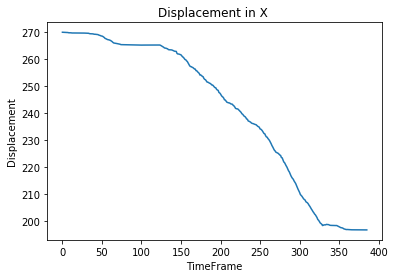

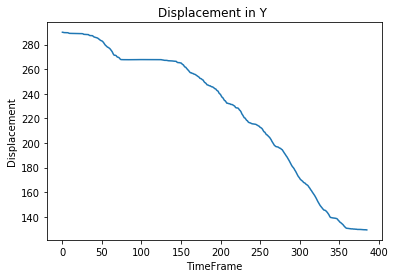

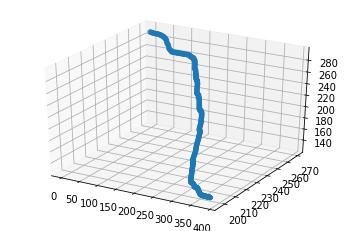

----------------------Node  66 ----------------------


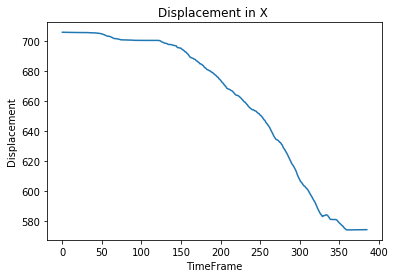

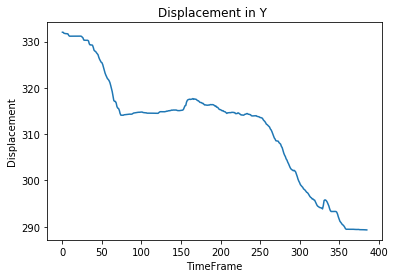

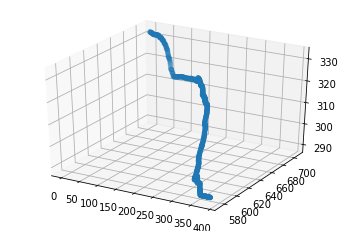

----------------------Node  93 ----------------------


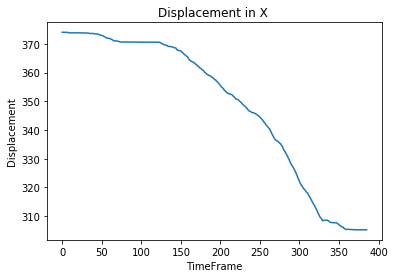

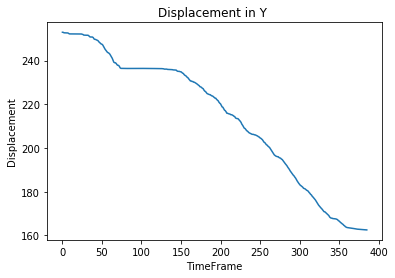

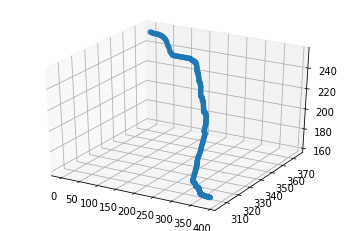

----------------------Node  78 ----------------------


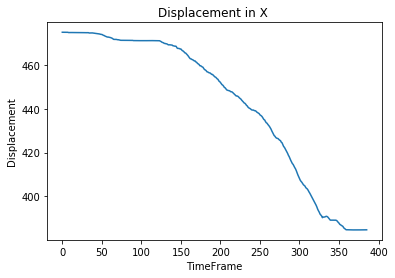

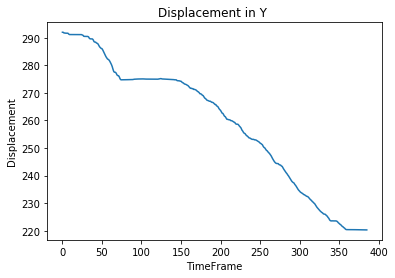

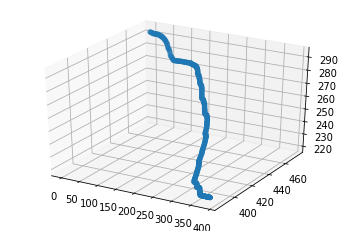

----------------------Node  104 ----------------------


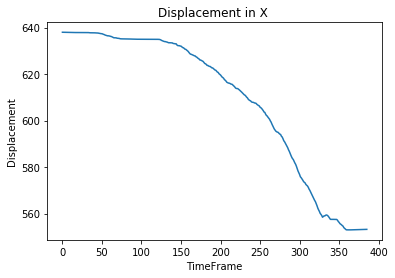

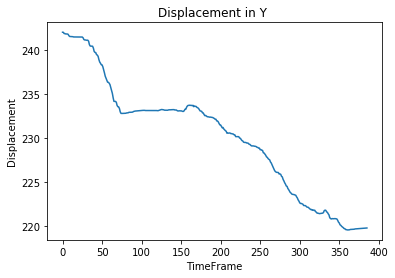

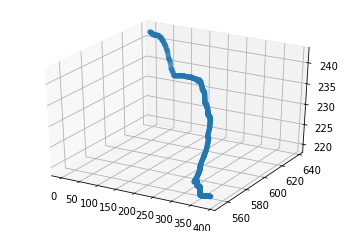

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

selg = [i for i in sel]

def displayGraps(sel):
    #ax = plt.axes(projection='3d')
    t = show1([trajectory[i]['point'] for i in sel])
    for j in sel:
        
        print("----------------------Node ", j, "----------------------")
        X = trajectory[j]["X"]
        Y = trajectory[j]["Y"]
        plt.xlabel("TimeFrame")
        plt.ylabel("Displacement")
        plt.title("Displacement in X ")
        plt.plot(trajectory[j]["X"])
        plt.show()
        
        plt.xlabel("TimeFrame")
        plt.ylabel("Displacement")
        plt.title("Displacement in Y ")
        plt.plot(trajectory[j]["Y"])
        plt.show()
        
        ax = plt.axes(projection='3d')
        ax.scatter3D(list(range(len(X))), X, Y);
        plt.show()
        
        
        
        
displayGraps(sel)
        
        
    

In [22]:
###-----------------------------------------Make changes for the axis here ----------------------------------------

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def findPoint(ti, point):
    v=0
    for j in ti.keys():
        if(ti[j]['point'][0] == point[0] and ti[j]['point'][1] == point[1]):
            v = j
    return v
        
def sort(points):
    for j in points.keys():
        for k in range(len(points[j])-1, 0, -1):
            for m in range(k):
                if(points[j][m+1][0] < points[j][m][0]):
                    p = points[j][m+1]
                    points[j][m+1]= points[j][m]
                    points[j][m]= p
    return points
        
        
def actualDistance(x, y):
    return abs(x-y)
def Graphs(t, Points, axis):

    bi = str('strain'+axis)
#     Points = sort(Points)
#     Points = Pointsy
    for j in Points.keys():
        h, g =0, 0
        
        for k in range(len(Points[j])-1):
            v = findPoint(trajectory, Points[j][k])
            vi = findPoint(trajectory, Points[j][k+1])
            h = vi
            g = v
            result = []
            for m in range(len(t[v][axis])):
                b = actualDistance(t[v][axis][m], t[vi][axis][m])
                result.append(b)
            
            t[v][bi] = result
        t[h][bi] = t[g][bi]
        
#     for j in Pointsy.keys():
#         h, g =0, 0
#         for k in range(len(Pointsy[j])-1):
#             v = findPoint(trajectory, Pointsy[j][k])
#             vi = findPoint(trajectory, Pointsy[j][k+1])
#             h = vi
#             g = v
#             result = []
#             for m in range(len(t[v]['Y'])):
#                 b = actualDistance(t[v]['Y'][m], t[vi]['Y'][m])
#                 result.append(b)
#             t[v]['strain'] = 0
#             t[v]['strainy'] = result
#         t[h]['strainy'] = t[g]['strainx']
#         t[h]['strain'] = 0
    return t
        
C = Graphs(trajectory, Pointsy, 'Y')
len(C[0]['strainY'])

386

In [23]:
trajectory[0]

{'point': [716, 451],
 'color': (11, 57, 13),
 'trajectory': 0,
 'X': [716,
  715.9774,
  715.9556,
  715.95557,
  715.9409,
  715.93414,
  715.9256,
  715.92114,
  715.7887,
  715.76715,
  715.7748,
  715.7679,
  715.7641,
  715.76685,
  715.74005,
  715.7387,
  715.7266,
  715.7122,
  715.7186,
  715.7188,
  715.7127,
  715.7196,
  715.72943,
  715.73303,
  715.75305,
  715.7656,
  715.7681,
  715.6568,
  715.6409,
  715.6408,
  715.6393,
  715.6513,
  715.6432,
  715.6577,
  715.519,
  715.4989,
  715.5042,
  715.49335,
  715.48395,
  715.4797,
  715.3338,
  715.32166,
  715.29395,
  715.2372,
  715.2093,
  715.09143,
  714.93134,
  714.7664,
  714.59454,
  714.4202,
  714.3556,
  714.0596,
  713.74615,
  713.49677,
  713.0212,
  712.7355,
  712.5116,
  712.276,
  712.248,
  712.0442,
  711.9344,
  711.62427,
  711.3453,
  710.96246,
  710.4657,
  710.1757,
  710.1507,
  710.1284,
  710.0181,
  709.70087,
  709.5693,
  709.5271,
  709.3783,
  709.0572,
  708.9128,
  708.91376,
  708

In [34]:
import math
def distance(x1, y1, x2, y2, check):
    p=0
    for j in check:
        j = j['X']
        if(x1 == j[0] and y1 == j[1]):
            p=1
    if(p==0):
        return abs(x1 - x2) + abs(y1 - y2)
    else:
        return -1
    
def color(check,image):
    
    inv = [1/check[i]['distance'] for i in range(4)]
    
    fac = [ inv[i]/sum(inv) for i in range(4) ]
    
    x, y, z = 0, 0, 0
    
    for j in range(4):
        x+= image[check[j]['X'][1], check[j]['X'][0]][0]*fac[j]
        y+= image[check[j]['X'][1], check[j]['X'][0]][1]*fac[j]
        z+= image[check[j]['X'][1], check[j]['X'][0]][2]*fac[j]
    return [int(x), int(y), int(z)]
    
def near(arr, x, y, image):
    check = []
    xmin = arr[0][0]
    ymin = arr[0][1]
    for k in range(4):
        m = 100
        for j in arr:
            c = distance(j[0], j[1], x, y, check)
            if(c<m and c!=-1):
                m = distance(j[0], j[1], x, y, check)
                xmin = j[0]
                ymin = j[1]
        check.append({'distance':m,'X':[xmin, ymin]})
    return color(check , image)


import pickle
with open('file.pkl', 'rb') as file:
      
    trajectory = pickle.load(file)
    
# with open('file1.pkl', 'rb') as file:
      
#     Points = pickle.load(file)
    
# with open('file2.pkl', 'rb') as file:
      
#     Pointsy = pickle.load(file)

In [19]:
trajectory[0]

{'point': [716, 451],
 'color': (11, 57, 13),
 'trajectory': [[716, 451],
  array([[[715.9774 , 450.88474]]], dtype=float32),
  array([[[715.9556 , 450.56674]]], dtype=float32),
  array([[[715.95557, 450.56598]]], dtype=float32),
  array([[[715.9409, 450.5469]]], dtype=float32),
  array([[[715.93414, 450.54196]]], dtype=float32),
  array([[[715.9256 , 450.53632]]], dtype=float32),
  array([[[715.92114, 450.47998]]], dtype=float32),
  array([[[715.7887 , 449.80545]]], dtype=float32),
  array([[[715.76715, 449.64392]]], dtype=float32),
  array([[[715.7748, 449.6446]]], dtype=float32),
  array([[[715.7679, 449.6329]]], dtype=float32),
  array([[[715.7641 , 449.62665]]], dtype=float32),
  array([[[715.76685, 449.62323]]], dtype=float32),
  array([[[715.74005, 449.61874]]], dtype=float32),
  array([[[715.7387 , 449.62225]]], dtype=float32),
  array([[[715.7266 , 449.61954]]], dtype=float32),
  array([[[715.7122, 449.6138]]], dtype=float32),
  array([[[715.7186 , 449.60767]]], dtype=float32)

In [44]:
import cv2
import numpy as np
img = cv2.imread('images/1.jpg')

kernel = np.ones((10,10),np.float32)/20

dst = cv2.filter2D(img,-5,kernel)

ksize = (10, 10)
image = cv2.blur(img, ksize) 



cv2.imshow('for', image)
cv2.imshow('for1', img)


cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [57]:
# r = HSBToRGB(11, 100, 100)
# r

In [58]:
# def inrout(mask1, y, x):
#     inorout = []
#     inorout1 = []
#     for i in range(mask1.shape[1]):
#         if mask1[y,i]!=0:
#             inorout.append(i)
#     for i in range(mask1.shape[0]):
#         if mask1[i,x]!=0:
#             inorout1.append(i)
#     v = len(inorout)!=0 and len(inorout1)!=0 and min(inorout)<=x and max(inorout)>=x and min(inorout1)<=y and max(inorout1)>=y
#     return v

In [59]:
# frm = cv2.imread('test_color.jpg')

# mask = cv2.resize(frm, (960, 540))

# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

# lower = np.array([0,180,0], dtype="uint8")
# upper = np.array([255, 255, 255], dtype="uint8")
    
# mask1 = cv2.inRange(mask, lower1, upper1)


# # cv2.imshow('mask2', mask1)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
# # cv2.waitKey(1)
# inrout(mask1, 100,350)

In [60]:
# mask1.shape

In [36]:
import math as Math

# def k(n, h):
#     return (n + h / 60) % 6

def fin(n, b, s, h):
    
    kfun = (n + h / 60) % 6
    return b * (1 - s * max(0, min(kfun, 4 - kfun, 1)))

def HSBToRGB(H, S, B):
    
    s= S/100
    b = B/100
    
    return [int(255 * fin(5, b, s, H)), int(255 * fin(3, b, s, H)), int(255 * fin(1, b, s, H))]

In [37]:
def check(xin, yin, mask, mask1, c):
    res = 0
    
    for j in c:
        if(xin == j[0] and yin == j[1]):
            res = -1
    if(res == -1):
        return res
    
    elif(mask1[yin, xin] == 255):
        res = near(c, xin, yin, mask)
        
    else:
        if(mask1[yin, 480] == 255):
            res = -1
        else:
            res = -2
    
    return res

In [26]:
###-----------------------------------------Make changes for the axis here ----------------------------------------4e

import cv2
import numpy as np
f = 386

images_arr = []

# fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
# video = cv2.VideoWriter('video.avi', fourcc, 1, (960, 540))


def get(c):
    lx = c[0][0]
    ly = c[0][1]
    mx = c[0][0]
    my = c[0][1]
    for j in c:
        if(lx>j[0]):
            lx = j[0]
        if(ly>j[1]):
            ly = j[1]
        if(mx<j[0]):
            mx = j[0]
        if(my<j[1]):
            my = j[1]
    return lx, ly, mx, my
        


lower1 = np.array([0,64,0], dtype="uint8")
upper1 = np.array([179,255,255], dtype="uint8")
    
cap = cv2.VideoCapture('video.mp4')
for j in range(f):

    _, frm = cap.read()
    
    if(j<0):
        continue
    if(j>100):
        print('dene with frame : ', j)
        break
    image = cv2.resize(frm, (960, 540)) 
    mask = cv2.resize(frm, (960, 540))
    
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
    
    
    mask1 = cv2.inRange(mask, lower1, upper1)
    
    print(mask1.shape)
    
    if(j==0):
        for k in trajectory.keys():
            cv2.circle(image, (trajectory[k]['point'][0],trajectory[k]['point'][1]) , 2, (255, 255, 255), -1)
    else:
        result = []
        print('coming')
        for k in trajectory.keys():
            mv = float(abs(trajectory[k]['strainY'][j] - trajectory[k]['strainY'][0]))
            mv1 = float(trajectory[k]['strainY'][0])
            result.append(mv/mv1)
        
        
        m = max(result)
        m1 = min(result)

        result  = [np.interp(result[i],[m1,m],[0,1])   for i in range(len(result))]


        m = max(result)
        m1 = min(result)

        coordinates = []
        for k in range(len(trajectory.keys())): 
            S = 100
            H = int(np.interp(result[k],[m1,m],[0, 230]))
            B = 100
            rgb = HSBToRGB(H, S, B)
            x_cord = round(trajectory[k]['X'][j])
            y_cord = round(trajectory[k]['Y'][j])
            coordinates.append([x_cord, y_cord])
            image[y_cord, x_cord] = [rgb[-1], rgb[1], rgb[0]]
            #cv2.circle(mask, (trajectory[k]['X'][j],trajectory[k]['Y'][j]) , 5,[rgb[-1], rgb[1], rgb[0]], -1)
        name = 'imagesb/'+str(j)+'.jpg'
        cv2.imwrite(name, image)
        al = []
#         print(len(coordinates))
        lx, ly, mx, my = get(coordinates)
        for yin in range(ly-10, my+10):
            for xin in range(lx-10, mx+10):
                res = check(xin, yin, image, mask1, coordinates)
                
                if( res == -1):
                    continue
                elif(res == -2):
                    break

                image[yin, xin] = res
                al.append([xin, yin])
#             print("Done with row : ",yin, 'frame : ', j )
#     cv2.imshow('Analysis', image)
    name = 'images12/'+str(j)+'.jpg'
    name1 = 'images/mask'+str(j)+'.jpg'

    images_arr.append(image)
    cv2.imwrite(name, image)
#     cv2.imwrite(name1, mask1)
    print('Done with frame ', j)
    if cv2.waitKey(1) == 27:
        cap.release()
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.waitKey(1)



cap.release()





(540, 960)
Done with frame  0
(540, 960)
coming
Done with frame  1
(540, 960)
coming
Done with frame  2
(540, 960)
coming
Done with frame  3
(540, 960)
coming
Done with frame  4
(540, 960)
coming
Done with frame  5
(540, 960)
coming
Done with frame  6
(540, 960)
coming
Done with frame  7
(540, 960)
coming
Done with frame  8
(540, 960)
coming
Done with frame  9
(540, 960)
coming
Done with frame  10
(540, 960)
coming
Done with frame  11
(540, 960)
coming
Done with frame  12
(540, 960)
coming
Done with frame  13
(540, 960)
coming
Done with frame  14
(540, 960)
coming
Done with frame  15
(540, 960)
coming
Done with frame  16
(540, 960)
coming
Done with frame  17
(540, 960)
coming
Done with frame  18
(540, 960)
coming
Done with frame  19
(540, 960)
coming
Done with frame  20
(540, 960)
coming
Done with frame  21
(540, 960)
coming
Done with frame  22
(540, 960)
coming
Done with frame  23
(540, 960)
coming
Done with frame  24
(540, 960)
coming
Done with frame  25
(540, 960)
coming
Done with f

In [1]:
for j in range(len(images_arr)):
    image420 = images_arr[j]

    cv2.imshow('delta', image420)
    i=0
    cv2.waitKey(500)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

NameError: name 'images_arr' is not defined

In [15]:
with open('images_arr2.pkl', 'wb') as file:
      
    x={1:images_arr}
    pickle.dump(x, file)

In [ ]:
import cv2
import time
ci = 323
for j in range(ci):
    name = 'images/'+str(j)+'.jpg'
    image = cv2.imread(name)
    cv2.imshow('ana', image)
#     time.sleep(0.5)
    if cv2.waitKey(1) == 27 or j == ci-1:
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break
cv2.destroyAllWindows()

In [ ]:
# import pickle

# ali = {'res':al}
# with open('ali.pkl', 'wb') as file:
      
#     pickle.dump(ali, file)

In [ ]:
l =list(range(10))

def G(li):
    li1 = li.copy()
    li1[1] = 10
    return li

C = G(l)
l


In [ ]:
# Strain

for j in Points[]

In [ ]:
round(715.9774)

## Testing

In [ ]:
import cv2

image = cv2.imread('test.jpg')

image = cv2.resize(image, (960, 540))
print(image.shape)

new_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#showImg(3, None,new_gray)
new_gray[203][297]
#[271,252]
#297 203

In [ ]:
#min(new_gray)

image = cv2.imread('test.jpg')

image = cv2.resize(image, (960, 540))
print(image.shape)

new_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

count=0
arr = []


def find(pixcel, i, j):
    c=0
    for k in pixcel:
        if(abs(k[0]-i) <=24 and abs(k[1]-j) <=24):
            c=1
    return c     
        
    
cou=0
m = new_gray[0][0]
for j in range(new_gray.shape[0]):
    for k in range(new_gray.shape[1]): 
        if(find(arr, k, j) == 1):
            cou+=1
            continue
            
        if(new_gray[j][k] <= 100 and new_gray[j][k] >0):
            arr.append([k, j])
            count+=1
            
            
m,count,cou
        

## Finding C colour

In [1]:
import cv2

cap = cv2.VideoCapture('front50.mp4')

_, frm = cap.read()
frm = cv2.resize(frm, (960, 540))

cv2.imshow('wind', frm)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [6]:
#finding hsv range of target object(pen)
import cv2
import numpy as np
import time
# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Initializing the webcam feed.
#cap = cv2.imread('test_color.jpg')

cap1 = cv2.VideoCapture('front50.mp4')

_, frm = cap1.read()
cap = cv2.resize(frm, (960, 540))

cv2.imshow('wind', frm)

# Create a window named trackbars.
cv2.namedWindow("Trackbars")

# Now create 6 trackbars that will control the lower and upper range of 
# H,S and V channels. The Arguments are like this: Name of trackbar, 
# window name, range,callback function. For Hue the range is 0-179 and
# for S,V its 0-255.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
while True:
    
    # Start reading the webcam feed frame by frame.
    #ret, frame = cap.read()
    frame = cap
    
    # Flip the frame horizontally (Not required)
    frame = cv2.flip( frame, 1 ) 
    
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the new values of the trackbar in real time as the user changes 
    # them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # Set the lower and upper HSV range according to the value selected
    # by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # Filter the image and get the binary mask, where white represents 
    # your target color
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # You can also visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Converting the binary mask to 3 channel image, this is just so 
    # we can stack it with the others
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack the mask, orginal frame and the filtered result
    stacked = np.hstack((mask_3,frame,res))
    
    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
    
    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    # If the user presses `s` then print this array.
    if key == ord('s'):
        
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as penval.npy
        np.save('hsv_value',thearray)
        break
    
# Release the camera & destroy the windows.    

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
1. missing points, no overlap.
2. processing video on uploading
3. labels for points 
4. time vs  
5. pic in SS


inputs: 
20 cm - distance from object

150 mm breth

100 mm height


In [ ]:
#important

import cv2
import numpy as np
import random

def find(pixcel, i, j):
    c=0
    for k in pixcel:
        if(abs(k[0]-i) <=15 and abs(k[1]-j) <=15):
            c=1
    return c 

selected = []

def findPoints():
    ix, iy, k = 0, 0, 1    

    color = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for j in range(160+10)]
    color[0]


    image1 = cv2.imread('test_color.jpg')

    image1 = cv2.resize(image1, (960, 540))
    
    imag230 = image1.copy()

    image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

    # cv2.imwrite('test_hsv.jpg', image2)        

    lower = np.array([0,180,0], dtype="uint8")
    upper = np.array([255, 255, 255], dtype="uint8")


    lower1 = np.array([0,63,0], dtype="uint8")
    upper1 = np.array([179,111,255], dtype="uint8")

    mask = cv2.inRange(image2, lower, upper)


    ################# cnts represent contours of black dots on the object #####################

    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask1 = cv2.inRange(image2, lower1, upper1)
    
    ################# cnts1 represent contours of Outline of yellow box(object) #####################
    
    cnts1 = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]

    
    print( len(cnts), len(cnts[0]),len(cnts[1]))

    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    #cv2.drawContours(imag230, [cnts1], 0, (0, 0, 255), 5)

    



    pixcel = []
    arr = []
    image10 = image1.copy()
    image11 = image1.copy()
    count=-1
    ########################## marking the center point of each contour to hilight each of the black dot #########
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if(find(pixcel, x, y) == 1):
            continue
        count+=1
        pixcel.append([x, y])
        avgx = 0
        avgy = 0
        for j in c:
            avgx+=j[0][0]
            avgy+=j[0][1]
        avgx = int(avgx/len(c))
        avgy = int(avgy/len(c))
        arr.append([avgx, avgy])
        #cv2.rectangle(image10, (avgx, avgy), (avgx + 2, avgy + 2), color[count], 2)

        image10 = cv2.putText(image10, str(count), (avgx, avgy),cv2.FONT_HERSHEY_SIMPLEX,0.3,(255, 0, 0),1,cv2.LINE_AA)
        cv2.rectangle(image1, (x, y), (x + w, y + h), color[count], 2)

    cont = []
    
    ########################## cnts1(Contour of the box (object), marking all the points of the contour)###########
    
    for c in cnts1:
        for b in c:
            x = b[0][0]
            y = b[0][1]
            cont.append([x, y])
            cv2.circle(image11, (x,y),3, (36,255,12), -1)


    



    new_gray = cv2.cvtColor(image11, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('mask1.jpg', mask1)
    
    ########################## mask1 represents the outline box of the object #######################
    combined = cv2.addWeighted(mask1, 0.7, new_gray , 0.3, 0.1)
    
    
    
    cv2.imshow('comb', combined)
    cv2.imshow('Labels', image10)
    cv2.imshow('mask1', mask1)
    cv2.imshow('original', image11)
    cv2.imshow('image', image1)
    cv2.imshow('new', imag230)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    return arr, cont, selected

In [ ]:
findPoints()

## Variables and DataTypes

Python has no command for declaring a variable.

A variable is created the moment you first assign a value to it.

for ex : int 5 = 0 , (Not accepted)

In [ ]:
a = 5


type(a)   # Function to check the type of variable


In [ ]:
b^tth = 1

In [ ]:
u cant have a numner in the begining
u cant have -, * , & , %, # 



A, a, 12, 
_


In [ ]:
a = 'bidb'


# a= ""5""

type(a)

In [ ]:
a = 5.1244

type(a)

In [ ]:
ctrl + /  - command

In [ ]:
# a = 2j;

a = 5.99999

## Type casting

# a = bool( False )

# a = "5"

# a = int(    "50003"                         )

# a = str(  5  )

a = int( a )

# a = int(6.0)

# a = str( a )

print(a)

In [ ]:

ragh = 10
a = 5
b = 10

print( "The number is\t\t\n: ", ragh, a, b, "This" )

In [ ]:
## Strings

a = "this is an array    * ) "

len(    a         )

# string - array

# a[-1]

# a[1:5]                # will get the String from position 1 to position 5-1 

In [ ]:
#Concatenation

b = " End2"

a  =  " end "

b = a+b+b

print(b, a)

In [ ]:
print("this\ttab \n \x45")

In [ ]:
print( "this"+" second sentence"+"third" )

In [ ]:
print()

## Operators

In [ ]:
## add 

a = 12

b = -5

d = 5
print( a+b, a-b, a*b, a/b )

2.4


[ -3.4 ]
print(a/b)

a // d + 1

In [ ]:
## Floor

a = 14.34
b = 6

print( a / b )

a // b

## logical


and , or 


In [ ]:

a = 5


b = 5.0

# print( a == b )

a = 5 < 7

b = 8 > 100

print( a or b )

In [ ]:

b = (1>10) or (3>1)

c = (True) or (3)

d = (1<4) and (False)

b, c, d

In [ ]:
import math

math.sqrt(5)



In [ ]:
a=5

b=         10

a+=b     ### a = a+b
a-=b     ### a= a-b

a = a*b

print(a)

In [ ]:
a = 3

a %   2

In [ ]:
print(a)

In [ ]:
a = 3
print(a)

In [ ]:
[ 
    
[  [1, 2, 3] , 
   [2, 4, 5] ,
],
    
    
[ 
    [1, 2, 3] , 
   [2, 4, 5] ,
]

]




# sdfcvsdvsdsvsdvsdvv

## Numpy 

In [ ]:
import numpy as np

In [ ]:

arr = np.array(    [1, 2, 3]   )

# arr = np.array(   [ 1, 2, 3, 4.0, "5", True ]   )


arr = np.array( [ 
    
[  [1, 2, 3] , 
   [2, 4, 5] ,
],
    
    
[ 
    [1, 2, 3] , 
   [2, 4, 5] ,
]

] )

arr = np.array(  [] , ndmin = 10)

type(   arr   )

# arr.shape

print(arr)

In [ ]:
## Indexing

arr = np.array(
    [ 
        [   
            [ 1,  2, 3 ] , 
            [ 1,  2, 3 ] 
        ]
        
        ,
        
        [   
            [ 11,  12, 13 ] , # 0
            [ 11,  12, 31 ]  # 1
            
        ]
    ] 
)

dim3 = arr
dim2 = arr[1]
dim1 = arr[1][1]


arr[1][1][1] = "120"

print(arr)


In [ ]:
arr = np.array(
    [ 
        [   
            [ 1,  2, 3 ] , 
            [ 1,  2, 3 ],
            [ 123,  2232, 34 ] 
        ]
        
        ,
        
        [   
            [ 11,  12, 13 ] , 
            [ 11,  12, 31 ] ,
            [ 11,  12, 31 ] ,
            
        ],
        [   
            [ 110,  102, 103 ] , 
            [ 1168676,  120, 310 ],
            [ 116867633,  232120, 32310 ],
            
        ],
        [   
            [ 1231,  14232, 1334 ]   , # 0
            [ 11342,  23412, 2331 ]  ,
            [ 1134223423432,  "23412234243", "2331324" ]
            
        ]
    ] 
)

In [ ]:

arr[3][0] =[0, 0, 0]

arr

In [ ]:
## Slicing

arr = np.array([ 1,  2     ,  3, 4, 5, 6])

arr[2] = 0                 ## Prints the total array from 0th Index to the 5-1

arr

In [ ]:
## Conversion of datatyoes in numpy

arr = np.array( [1, '2', '3'] ,  dtype='i')

arr

In [ ]:
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))


arr

In [ ]:

np.append(arr, 1)

## List

In [ ]:
a = [1, "2", True, 4j, 5]

type(a)

In [ ]:
b = np.array( [1, 2, 3, 4] )

b = list( b   )
b.append(100)

b = np.array( b )
type(b), b

In [ ]:
a.append([12])

In [ ]:
a[-1]

In [ ]:
int , float, str, complex, bool, list, numpy, dictionaries, dataframes


## Conditional Statements and Loops

Indetations are compulsory

In [ ]:
condition = 5 > 7
condition1 = True

if (condition):
    print("if")
    
    
elif(condition):
    print("if")
    ## do this task
    
    
else:
    print("else")

In [ ]:
range(1000)

In [ ]:
list(range(1, 10, 2))

In [ ]:
## For Loop


for i in range(100):
    
    ## calculations
    print(i)
    
print('ragh')

In [ ]:
fruits = ["apple", {12:"something"}, "cherry"]

for x12 in fruits:
    print(x12)

In [ ]:
b = "Som"

c = ['S','o', 'm']

b[2]

In [ ]:


for x in "baanna":
    print(x)

In [ ]:
i = 1

while i < 6:
    print(i)
    i += 1

In [ ]:
i = 0

arr = [1, 2, 3, 4,5, 6]
while i < 6:
    print(arr[i], i)
    if arr[i] == 3:
        break
    i += 1

## Dictionaries


In [ ]:
# arrays -  dict 0 - len(array)

arr = [10, 20, 30]

example = {
    
    "0" :10,
    
    "ragh":20,
    
    '2':30
}

example[  'ragh'  ]

In [ ]:
c = "10"

example = {
    
    "math": [ 1, 2, 3, 4, 5, 6, 7 ] ,
    
    "science":   np.array([1, 2], ndmin = 10),
    
    c  : "Sample String",
    
    "100":  True,
    
    "electives" : {
        "DOM":40,
        "Oops":30,
        "30":  { "this":[1, 2, 3, [2, 323]] }
    }
}

type( example.keys() )


In [ ]:
## accessing the elements of a dictionary

example['math'], example["electives"], example["electives"]['DOM']

In [ ]:
a = [
    {
        "math":20,
        "science":30
    },
    
    
    {
        "math":206,
        "science":530
    },
    
    {
        "math":204,
        "science":306
    },
    
    {
        "math":120,
        "science":340
    }
]

a[1]['science']

In [ ]:
##Data frame and Pandas

In [ ]:
## pandas

import pandas as pd

rag = pd.read_csv( 'test.txt',sep=";")

rag

In [ ]:
# name= 'name'

rag['name']

In [ ]:
import csv

# open the file in the write mode
with open('text1.txt', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow("69")


In [ ]:
## Funcrions

def Ragh(fname, lname):
    print(fname + " " + lname)

In [ ]:
def recursion(k):
    if(k>0):
        return k
    else:
        k+recursion(k-1)
    return s

recursion(5)


In [ ]:
v1 =  [2, 2, 3, 4,3, 4,"true", "something"]

v1[-1]


In [ ]:
uy = [ 12, 10, 8, 6 ]

In [ ]:
import numpy as np

# v= np.arange(a, b, c)    ###  creates an array of numbres from {a} to {b-c}

## { a, b-c}

v= np.arange(0, 100, 2.5) 

## {200, -4.5 }

# v1= np.arange(10)

# v= np.arange(1, 10 )

# v= np.arange(10, 1)

print(v)

In [ ]:
first_100 = range(100, -1, -1.5)

for j in first_100:
    print(j)

In [ ]:
## Graphs is just plottign a few desired points on the coordinate axis
## We need to create this points , store it in an array and plot it. 

## plotting Graphs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

# plt.xticks( [ 2*i for i in range(1, 100, 9)] )

plt.plot( [1, 4, 2, 10, 20, 100]   )



In [ ]:
students = [ "john", "ragh", "someone", 'ejf' ]

marks = [10, 90, 20, 10]

plt.plot( students, marks  )

In [ ]:

plt.xlabel('Students')
plt.ylabel('Marks')

plt.title("Marks for Students")

plt.plot( [10, 20, 30]  ,  range(3, 0, -1)  )

# plt.plot(['point1', 'point2', 'point3'],range(3))


In [ ]:

plt.rcParams['figure.figsize'] = [7, 5]


In [ ]:
a= 10
b=20

b+=a
b

In [ ]:
M = [[ 1, 2, 3],
[4, 5, 6 ],
[10, 20, 30 ]]


print(len(M[0]))



lm = [ [0 for j in range(3)] for i in range(3) ]
print(lm)

for i in range(len(M)):
    for j in range(len(M[i])):
        lm[i][j] += math.log(M[i][j])
print(lm)

for i in range(len(lm)):
    for j in range(len(M[i])):
        lm[i][j] += math.log(M[i][j])
        
lm

In [ ]:
x = np.arange(1, 10)

y = [ i**2 for i in x ]

print(x,y)

In [ ]:
import math

x = np.arange(0, 100) 
# x = [1, 2, 3, 4, 5, 6, 7, 8, 9]

y = [ i**2 for i in x ]

z = [ math.sqrt(   i   ) for i in x ]

# plt.plot(x, y, label='square')

plt.plot(x, label = 'linear')

plt.plot(z, label = 'sqrt')

plt.legend()
plt.show()

In [ ]:
plt.xticks([0, 1, 2, 3])

plt.yticks([0, 1, 2, 3])


plt.plot(range(3, 0, -1),range(3, 0, -1),label = 'reverse')

plt.plot(range(3),range(3, 0, -1), label = 'straight')

## xaxis = [3, 2, 1], y =[3, 2, 1]

plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)

y   = np.cos( time ) 

# plt.xlabel()
# plt.ylabel()

# plt.title()

# plt.xticks()
# plt.yticks()

plt.plot(x, y, color='green', linestyle='dashed')


plt.show()

In [ ]:
import math

x = np.arange(1, 10) 

y = [ math.log(i) for i in x ]


plt.plot(x, y, label='sqrt')

plt.show()

In [ ]:
x1 = np.linspace(0.0, 5.0, 100)

y1 = np.cos(2 * np.pi * x1) * np.exp(x1)

fig, ax = plt.subplots(figsize=(7, 5))


ax.plot(x1, y1)

ax.set_xlabel('Something in X')

ax.set_ylabel('f(X)')

plt.show()

In [ ]:
plot  - x, y, label

xlabel
ylabel

title

xticks

yticks


In [ ]:
import pandas as pd

file = pd.read_csv('test.txt', sep=';')

index = file.keys()

file[ index ]

In [ ]:
plt.plot(file['name'], file['age'])